In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [196]:
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data["MEDV"] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- `CRIM` — уровень преступности на душу населения;
- `ZN` — процент земли, застроенной жилыми домами (только для участков площадью свыше 25000 кв. - футов);
- `INDUS` — процент деловой застройки;
- `CHAS` — 1, если участок граничит с рекой; 0 в противном случае (бинарный признак);
- `NOX` — концентрация оксида азота, деленная на 10^7;
- `RM` — среднее число комнат (по всем домам рассматриваемого участка);
- `AGE` — процент домов, построенных до 1940 г. и занимаемых владельцами;
- `DIS` — взвешенное расстояние до 5 деловых центров Бостона;
- `RAD` — индекс удаленности до радиальных магистралей;
- `TAX` — величина налога в `$10000`;
- `PTRATIO` — количество учащихся, приходящихся на одного учителя (по городу);
- `B` = 1000(AA − 0.63)^2, где `AA` — доля афро-американцев;
- `LSTAT` — процент жителей с низким социальным статусом;
- `MEDV` — Median value of owner-occupied homes in `$1000`.
Признак `CHAS` — бинарный, остальные — количественные. Выходом является переменная `MEDV`, равная медианному значению цены строения (по всем домам участка) в `$1000`.

> Объясните почему значение коэффициента корреляции между `MEDV` и переменными `RM` и `LSTAT` имеет противоположные знаки (исходя из описания переменных).

> ___Показатель RM (количество комнат) имеет положительное влияние на стоимоть жилья, в то время как LSTAT (процент жителей с низким социальным статусом) имеет негативное влияние на стоимость жилья___

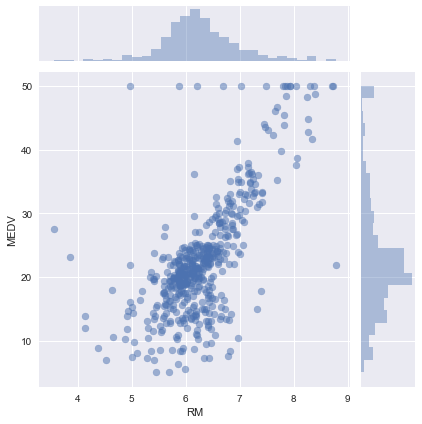

In [5]:
sns.jointplot(data["RM"], data["MEDV"], kind="scatter", joint_kws={"alpha":0.5});

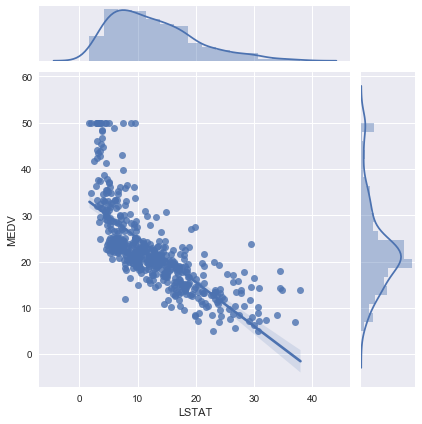

In [6]:
sns.jointplot(data["LSTAT"], data["MEDV"], kind="reg");

In [7]:
data[["RM", "MEDV"]].describe()

,RM,MEDV
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


Также можем сделать следующие предположения:

- 16 наблюдений `MEDV` имеют значение 50.0. Скорее всего эти наблюдения содержали пропуски или не было возможности указать действительную цену дома, поэтому эти наблюдения могут быть исключены из набора данных.
- одно наблюдение признака `RM` имеет значение 8.78. Это наблюдение может рассматриваться как выброс и может быть исключено из набора данных;
- два наблюдения признака `RM` имеют значения меньше 4. Наблюдения можно рассматривать как выбросы и должны быть исключены из набора данных.

Итак, модель которую мы будем строить имеет следующий вид:

$$MEDV = \theta_0 + \theta_1 \times RM$$

Исключаем выбросы

In [208]:
data = data.loc[data['MEDV'] != 50]
data = data.loc[data['RM'] != 8.78]
data = data.loc[data['RM'] > 4]

Также я посчитал выбросами значения `MEDV` равные 5.0

In [209]:
data = data.loc[data['MEDV'] != 5]
data.shape

(485, 14)

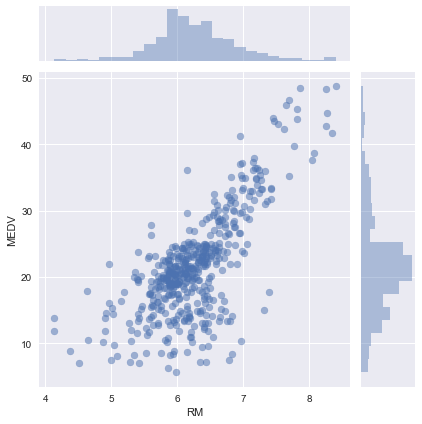

In [210]:
sns.jointplot(data["RM"], data["MEDV"], kind="scatter", joint_kws={"alpha":0.5});

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm

In [212]:
X = data["RM"]
y = data["MEDV"]

In [213]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)
Y_train

12     21.7
300    24.8
136    17.4
248    24.5
96     21.4
       ... 
196    33.3
336    19.5
120    22.0
286    20.1
309    20.3
Name: MEDV, Length: 324, dtype: float64

In [214]:
class GDRegressor:

    def __init__(self, alpha=0.04, n_iter=100, progress=True):
        self.alpha = alpha
        self.n_iter = n_iter
        self.disable = not progress
        

    def fit(self, X, y):
        # PUT YOUR CODE HERE
        theta_zero = 0
        theta_one = 0
        theta_zero_history = []
        theta_one_history = []
        cost_history = []
        for i in range(self.n_iter):
            for_cost = 0
            error_zero = 0
            error_one = 0
            
            for j in range(1, len(list(y))):
                error_one += ((theta_zero + theta_one*(list(X)[j]) - list(y)[j])*(list(X)[j]))
            for j in range(1, len(list(y))):
                error_zero += (theta_zero + theta_one*(list(X)[j]) - list(y)[j])
                for_cost += (theta_zero + theta_one*(list(X)[j]) - (list(y)[j]))**2
            
            grad_one = error_one*self.alpha/len(Y_train)
            grad_zero = error_zero*self.alpha/len(Y_train)
            theta_zero -= grad_zero
            theta_one -= grad_one
            
            theta_zero_history.append(theta_zero)
            theta_one_history.append(theta_one)
            cost = for_cost/(2*len(Y_train))
            cost_history.append(cost)
            
            self.loss_history = cost_history
            self.intercept_history = theta_zero_history
            self.coef_history = theta_one_history
            self.coef_ = theta_one
            self.intercept_ = theta_zero
        return self.coef_, self.intercept_

    def predict(self, X_test):
        predictions = []
        
        for i in range(1,len(list(X_test))):
            predictions.append(self.coef_*list(X_test)[i]+self.intercept_)
        
        self.predictions = predictions
        return self.predictions

In [215]:
model = GDRegressor(alpha=0.04, n_iter=2000)
%time model.fit(X_train, Y_train)

Wall time: 2min 33s


(6.198414435341901, -16.99022108403312)

In [216]:
model.coef_, model.intercept_

(6.198414435341901, -16.99022108403312)

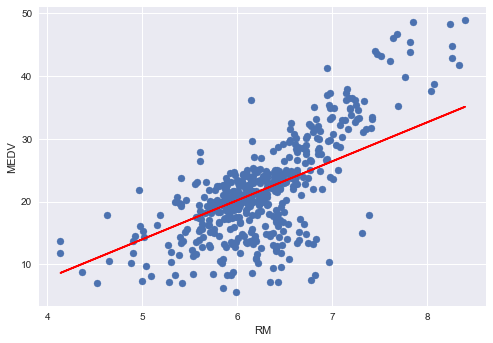

In [217]:
plt.scatter(data["RM"], data["MEDV"])
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.plot(X_train, model.coef_ * X_train + model.intercept_, "r");

In [218]:
def plot_coeffs(model):
    plt.figure(figsize=(14, 5))
    plt.subplot(121)
    plt.plot(list(range(model.n_iter)), model.intercept_history)
    plt.subplot(122)
    plt.plot(list(range(model.n_iter)), model.coef_history);

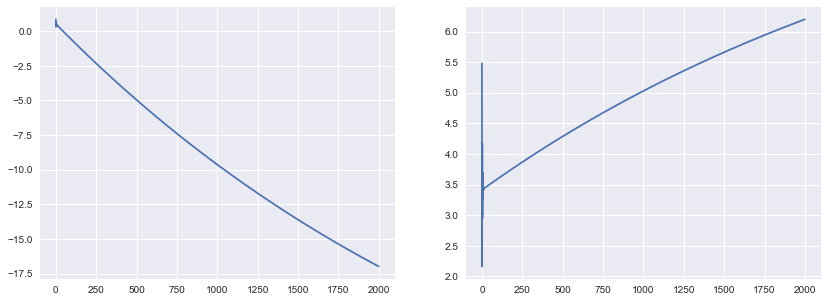

In [219]:
plot_coeffs(model)

In [220]:
def plot_loss_function(model):
    plt.xlabel("Iterations")
    plt.ylabel("Average square loss")
    plt.plot(np.arange(model.n_iter), model.loss_history);

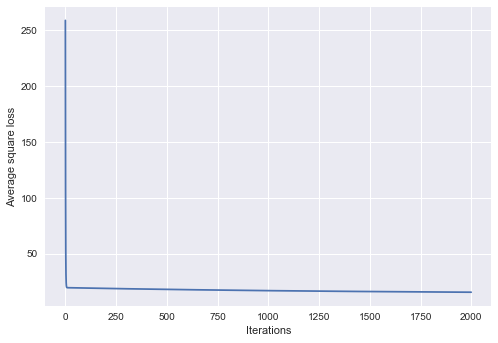

In [221]:
plot_loss_function(model)

### Оценка качества модели

Итак, мы нашли коэффициенты $\theta$, теперь надо как-то оценить качество работы полученной модели. Для этого мы воспользуемся коэффициентом детерминации $R^2$:

$$R^2 = 1 - \frac{\sum_{i=1}^{m}(y_i - \hat{y_i})^2}{\sum_{i=1}^{m}(y_i - \overline{y})^2}$$

и среднеквадратичной ошибкой:

$$RMSE = \sqrt{\frac{\sum_{i=1}^{m}(\hat{y_i} - y_i)^2}{m}}$$

[Коэффициент детерминации](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью. Более точно — это единица минус доля необъяснённой дисперсии (дисперсии случайной ошибки модели, или условной по признакам дисперсии зависимой переменной) в дисперсии зависимой переменной.

Среднеквадратичная ошибка характеризует отклонение реальных данных от линии регрессии и измеряется в тех же единицах, что и зависимая переменная ($y$).

Вашей задачей является написать две функции для вычисления коэфиициента детерминации и среднеквадратичной ошибки:

$$ \hat{y_i} $$ Это значения, предсказанные моделью

$$ y_i $$ Это реальные значения y

$$ \overline{y} $$
Это среднее значение реального y

Коэфф. детерминации измеряется в диапазоне [0;1]

In [222]:
np.mean(Y_test)

21.989440993788822

In [223]:
Y_pred = model.predict(X_test)

In [224]:
def rmse(y_hat, y):
    y = y[1:]
    upper_sum = 0
    
    for i in range(len(list(y))):
        upper_sum += (list(y)[i]-list(y_hat)[i])**2
    
    return (upper_sum/len(y))**0.5

In [225]:
def r_squared(y_hat, y):
    y_overline = np.mean(y)
    y = y[1:]
    upper_sum = 0
    lower_sum = 0
    
    for i in range(len(list(y))):
        upper_sum += (list(y)[i]-list(y_hat)[i])**2
        lower_sum += (list(y)[i]-y_overline)**2
        
    return 1 - (upper_sum/lower_sum)

In [226]:
r_squared(Y_pred, Y_test), rmse(Y_pred, Y_test)

(0.5223806721676678, 5.875657205509572)

Проведем небольшой анализ регрессионных остатков:

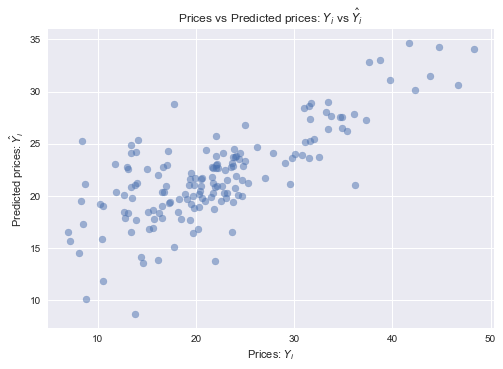

In [227]:
plt.scatter(Y_test[1:], Y_pred, alpha=0.5)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$");

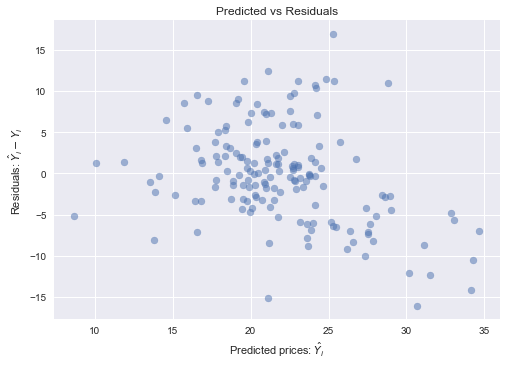

In [228]:
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Residuals: $\hat{Y}_i - Y_i$")
plt.title("Predicted vs Residuals");
plt.scatter(Y_pred, (Y_pred-Y_test[1:]), alpha=0.5);

### Если не исключать выбросы
R^2 = 0.485, RMSE = 6.52

### Если исключить выброы
R^2 = 0.522, RMSE = 5.87

## Нормализация

Вы должны были обратить внимание, что увеличилось необходимое число итераций для сходимости алгоритма. Одним из способов повлиять на это является нормализация признаков. Мы будем использовать один из самых простых и распространенных способов нормализации - Standart Scaling (Z-score normalization):

$$x' = \frac{x - \overline{x}}{\sigma_x}$$

> Замечание: Про важность нормализации признаков можно почитать [тут](https://www.robertoreif.com/blog/2017/12/16/importance-of-feature-scaling-in-data-modeling-part-1-h8nla) и [тут](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling).

Напишите функцию `z_scaler` для нормализации значений:

Еще одним из распространенных методов нормализации является min-max нормализация:

$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$

###### Z_score norm.

In [242]:
def z_scaler(feature):
    mean = np.mean(feature)
    std = np.std(feature)
    z = []
    for i in range(len(list(feature))):
        z.append((list(feature)[i]-mean)/std)
    return z

In [238]:
X_scaled = z_scaler(X)
y_scaled = z_scaler(y)

In [239]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.04, n_iter=2000)
model.fit(X_train, Y_train)

(0.7383784815551941, -0.004616714173657526)

In [240]:
Y_pred = model.predict(X_test)
rmse(Y_pred, Y_test), r_squared(Y_pred, Y_test)

(0.7064852704843486, 0.5777228387830124)

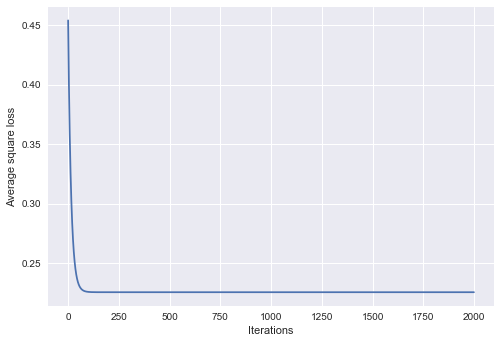

In [241]:
plt.xlabel("Iterations")
plt.ylabel("Average square loss")
plt.plot(np.arange(model.n_iter), model.loss_history);

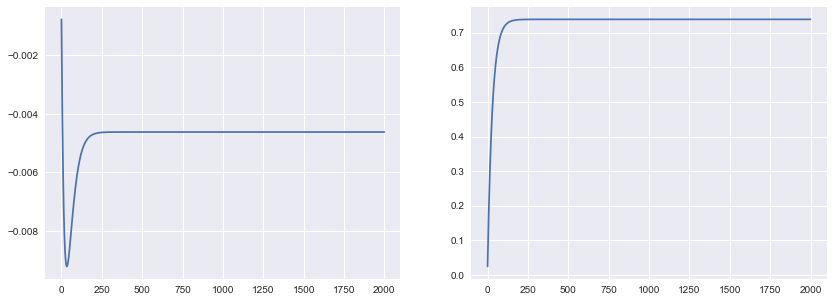

In [243]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(list(range(model.n_iter)), model.intercept_history)
plt.subplot(122)
plt.plot(list(range(model.n_iter)), model.coef_history);

###### Min-max norm.

In [247]:
def min_max(feature):
    ma = np.max(feature)
    mi = np.min(feature)
    min_max = []
    for i in range(len(list(feature))):
        min_max.append((list(feature)[i]-mi)/(ma-mi))
    return min_max

In [248]:
X_scaled = min_max(X)
y_scaled = min_max(y)

In [249]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.04, n_iter=2000)
model.fit(X_train, Y_train)

(0.6719902609914147, 0.03893477398484876)

In [250]:
Y_pred = model.predict(X_test)
rmse(Y_pred, Y_test), r_squared(Y_pred, Y_test)

(0.1328836256718981, 0.5440896789280938)

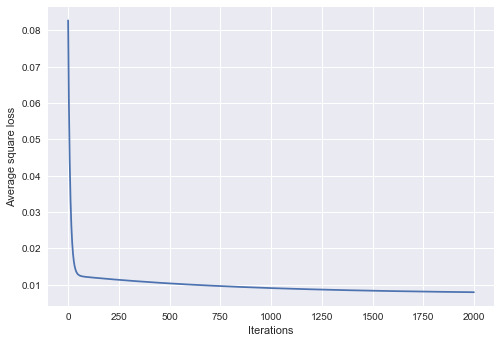

In [251]:
plt.xlabel("Iterations")
plt.ylabel("Average square loss")
plt.plot(np.arange(model.n_iter), model.loss_history);

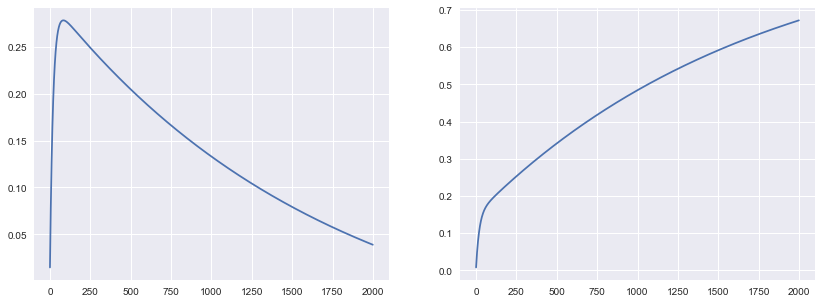

In [252]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(list(range(model.n_iter)), model.intercept_history)
plt.subplot(122)
plt.plot(list(range(model.n_iter)), model.coef_history);

### Пример с использованием библиотеки sklearn

Проделаем теже шаги с использованием библиотеки `sklearn`. Для начала построим модель:

In [286]:
from sklearn.linear_model import SGDRegressor

max_iter = 100
eta0 = 0.0001
model = SGDRegressor(
    loss='squared_loss',
    learning_rate='constant',
    max_iter=max_iter,
    eta0=eta0,
    alpha=0.0002
)

In [287]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df["MEDV"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [288]:
init_X = df[["RM"]]
init_y = df["MEDV"]

Чтобы нормализовать значения для обучения и валидации модели воспользуйтесь `StandardScaler` из библиотеки `sklearn`:

In [289]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(init_X, init_y, test_size = 0.33, random_state = 18)
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
Y_train = y_scaler.fit_transform(Y_train.values.reshape(-1, 1))
X_test = x_scaler.transform(X_test)
Y_test = y_scaler.transform(Y_test.values.reshape(-1, 1))

In [290]:
model.fit(X_train, Y_train.ravel())

SGDRegressor(alpha=0.0002, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [291]:
Y_pred = model.predict(X_test)

Чтобы найти среднеквадратичную ошибку и коэффициент детерминации:

In [292]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_score(Y_test, Y_pred), mean_squared_error(Y_test, Y_pred)

(0.49628285155516005, 0.4876676908092939)

In [293]:
model.coef_, model.intercept_

(array([0.55186803]), array([8.40841086e-05]))

Попробуем без выбросов

In [281]:
X = data[['RM']]

In [282]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 18)
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
Y_train = y_scaler.fit_transform(Y_train.values.reshape(-1, 1))
X_test = x_scaler.transform(X_test)
Y_test = y_scaler.transform(Y_test.values.reshape(-1, 1))

model.fit(X_train, Y_train.ravel())

Y_pred = model.predict(X_test)

In [283]:
r2_score(Y_test, Y_pred), mean_squared_error(Y_test, Y_pred)

(0.5532409304112276, 0.5827208601370248)

In [285]:
model.coef_, model.intercept_

(array([0.5641215]), array([-1.69688079e-05]))